# GEE+S3+Planetary Part1
> A tutorial of GEE+S3.

- toc: true 
- badges: true
- comments: true
- hide: false
- categories: [jupyter,Remote Sensing, Cloud Computing, Deep Learning]
- image: images/sentinel-2.png

In [1]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import boto3
import rasterio
from rasterio.windows import Window
from rasterio.session import AWSSession
import ee

In [3]:
# Trigger the authentication flow.
ee.Authenticate()
# Initialize the library.
ee.Initialize()

Enter verification code:  4/1AX4XfWglqHsKVbfLShwBgmF0ZEE0ESFakhKFKWTTaOICpWTbdW_gIsIPSyY



Successfully saved authorization token.


In [4]:
table = ee.FeatureCollection("users/robeson1010/zhongguo")
table=table.filterMetadata('id','equals','Hainan')
table=table.toList(1).get(0)
sar=ee.ImageCollection('COPERNICUS/S1_GRD').filter(ee.Filter.eq('transmitterReceiverPolarisation', ["VV","VH"])).filterDate('2017-01-01','2017-12-31').filterBounds(ee.Feature(table).geometry()).filterMetadata('orbitProperties_pass','equals','ASCENDING').filterMetadata('relativeOrbitNumber_start','equals',157).sort('system:time_start', True);

Get datalist from GEE

In [5]:
ll=sar.aggregate_array('system:index').getInfo()
ll

['S1A_IW_GRDH_1SDV_20170109T104832_20170109T104901_014754_018052_647B',
 'S1A_IW_GRDH_1SDV_20170109T104901_20170109T104926_014754_018052_C602',
 'S1A_IW_GRDH_1SDV_20170121T104831_20170121T104900_014929_0185D0_A6F6',
 'S1A_IW_GRDH_1SDV_20170121T104900_20170121T104925_014929_0185D0_BEBC',
 'S1A_IW_GRDH_1SDV_20170202T104831_20170202T104900_015104_018B17_2A64',
 'S1A_IW_GRDH_1SDV_20170202T104900_20170202T104925_015104_018B17_33D9',
 'S1A_IW_GRDH_1SDV_20170214T104831_20170214T104900_015279_0190A0_2E30',
 'S1A_IW_GRDH_1SDV_20170214T104900_20170214T104925_015279_0190A0_023E',
 'S1A_IW_GRDH_1SDV_20170226T104831_20170226T104900_015454_0195F7_1353',
 'S1A_IW_GRDH_1SDV_20170226T104900_20170226T104925_015454_0195F7_95F6',
 'S1A_IW_GRDH_1SDV_20170310T104831_20170310T104900_015629_019B43_B07B',
 'S1A_IW_GRDH_1SDV_20170310T104900_20170310T104925_015629_019B43_0F16',
 'S1A_IW_GRDH_1SDV_20170322T104847_20170322T104916_015804_01A07A_771E',
 'S1A_IW_GRDH_1SDV_20170322T104916_20170322T104941_015804_01A07A

In [32]:
#hide
access_key = ''
secret_access_key = ''
s3_url='s3://sentinel-s1-l1c/GRD/2021/11/26/IW/DV/S1B_IW_GRDH_1SDV_20211126T104834_20211126T104903_029758_038D40_E36B/measurement/iw-vh.tiff'
region_name = 'eu-central-1'

Read data from S3 by Cloud based TIFF

In [31]:
%%time
aws_session = AWSSession(aws_access_key_id=access_key,aws_secret_access_key=secret_access_key,region_name=region_name,requester_pays=True)
for l in ll:
    infos=l.split('_')
    s3url='s3://sentinel-s1-l1c/GRD/'+infos[4][:4]+'/'+str(int(infos[4][4:6]))+'/'+str(int(infos[4][6:8]))+'/'+infos[1]+'/'+infos[3][2:]+'/'+l+'/measurement/iw-vh.tiff'
    with rasterio.Env(aws_session):
        with rasterio.open(s3url) as src:
            profile = src.profile
            temp=src.read(window=Window(5000,5000,512,512))

CPU times: user 3.3 s, sys: 692 ms, total: 4 s
Wall time: 39.4 s


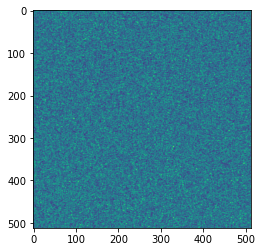

In [13]:
plt.imshow(temp[0])

PlaneteryComputer Way

In [27]:
%%time
import planetary_computer as pc
for l in ll:
    infos=l.split('_')
    pcurl='https://sentinel1euwest.blob.core.windows.net/s1-grd/GRD/'+infos[4][:4]+'/'+str(int(infos[4][4:6]))+'/'+str(int(infos[4][6:8]))+'/'+infos[1]+'/'+infos[3][2:]+'/'+l+'/measurement/iw-vh.tiff'
    pcurl=pc.sign_url(pcurl)
    with rasterio.open(pcurl) as src:
        profile = src.profile
        temp=src.read(window=Window(5000,5000,512,512))

CPU times: user 3.11 s, sys: 636 ms, total: 3.74 s
Wall time: 50.9 s


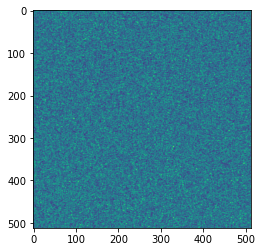

In [26]:
plt.imshow(temp[0])